In [1]:
import sys
import local_pcangsd as lp
import os
import lostruct
import ruptures as rpt
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
import seaborn as sns
import dask
import pandas as pd
import numpy as np

JAX Backend Enabled -- To disable set JAX_BACKEND=None before loading lostruct


In [2]:

results_dir ='/n/netscratch/edwards_lab/Lab/smorzechowski/meliphagid/analysis/2024-11-03/16-local_pcangsd/results/'
output_plot_dir='/n/netscratch/edwards_lab/Lab/smorzechowski/meliphagid/analysis/2024-11-03/16-local_pcangsd/manual_plots/'
output_table_dir='/n/netscratch/edwards_lab/Lab/smorzechowski/meliphagid/analysis/2024-11-03/16-local_pcangsd/tables/'
#del ds_pca


# window size: 50kb, 500 variants
#ds_pca = lp.load_dataset(results_dir + 'Nleu_neoZ_males_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_1_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_3_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_4_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_6_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_7_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_8_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_9_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_10_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_11_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_13_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_14_RagTag_rm_filt_results.zarr')


## window size: 10kb, 50 variants
#ds_pca = lp.load_dataset(results_dir + 'scaffold_12_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_15_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_16_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_17_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_18_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_19_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_20_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_22_RagTag_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'scaffold_25_RagTag_rm_filt_results.zarr')
ds_pca = lp.load_dataset(results_dir + 'pri_ptg000015l_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'pri_ptg000031l_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'pri_ptg000045l_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'pri_ptg000050l_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'pri_ptg000051l_rm_filt_results.zarr')
#ds_pca = lp.load_dataset(results_dir + 'pri_ptg000085l_rm_filt_results.zarr')

# and so on up to scaffold_39

## CHANGE THIS!!!!!!!!!!!!!!!
output_plot_name='ptg000015l'

results = lp.to_lostruct(ds_pca)

print(f"Results on {results.shape[0]} windows")


Results on 1650 windows


In [520]:
#store_dir ='/n/netscratch/edwards_lab/Lab/smorzechowski/meliphagid/analysis/2024-11-03/16-local_pcangsd/zarr_dir/'
### CHANGE THIS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ###
#zarr_file = 'Nleu_neoZ_males_rm_filt.zarr'
#ds = lp.load_dataset(store_dir + zarr_file, chunks=100000) # open the Dataset

In [3]:
#del pc_dists
pc_dists = lostruct.get_pc_dists(results, jax=False)

In [4]:
#del mds
mds = pcoa(pc_dists)

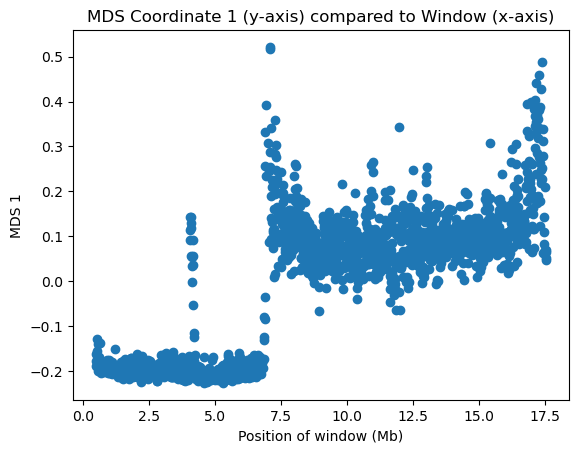

In [5]:
#del window_center
window_center = lp.get_window_center(ds_pca)
window_center_mb = window_center / 1e6

plt.figure()
plt.scatter(x=window_center_mb, y=mds.samples["PC1"])
_ = plt.title("MDS Coordinate 1 (y-axis) compared to Window (x-axis)")
_ = plt.xlabel("Position of window (Mb)")
_ = plt.ylabel("MDS 1")


# Add vertical lines for scaffold_4
#_ = plt.axvline(x=52.6, color='blue', linestyle='-', label='x=2') 
#_ = plt.axvline(x=80.8, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=89.9, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=105.8, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=120.4, color='blue', linestyle='-', label='Line at x=5') 

# Add vertical lines for scaffold_6
#_ = plt.axvline(x=8.3, color='blue', linestyle='-', label='x=2') 
#_ = plt.axvline(x=16.9, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=31.8, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=72.3, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=74.1, color='blue', linestyle='-', label='Line at x=5') 

# Add vertical lines for scaffold_8
#_ = plt.axvline(x=1.7, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=10.2, color='blue', linestyle='-', label='Line at x=5')
#_ = plt.axvline(x=15.1, color='blue', linestyle='-', label='Line at x=5')
#_ = plt.axvline(x=58.6, color='blue', linestyle='-', label='Line at x=5')

# Add vertical lines for scaffold_9
#_ = plt.axvline(x=1.4, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=15.9, color='blue', linestyle='-', label='Line at x=5')
#_ = plt.axvline(x=18.3, color='blue', linestyle='-', label='Line at x=5')

# Add vertical lines for scaffold_10
#_ = plt.axvline(x=6.3, color='blue', linestyle='-', label='x=2') 
#_ = plt.axvline(x=22.3, color='blue', linestyle='-', label='Line at x=5') 

# Add vertical lines for scaffold_13
#_ = plt.axvline(x=2.8, color='blue', linestyle='-', label='x=2') 
#_ = plt.axvline(x=22.9, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=24.7, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=31.7, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=32.5, color='blue', linestyle='-', label='Line at x=5')

# Add vertical lines for scaffold_14
#_ = plt.axvline(x=3.3, color='blue', linestyle='-', label='x=2') 
#_ = plt.axvline(x=6.7, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=9.8, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=16.5, color='blue', linestyle='-', label='Line at x=5') 

# Add vertical lines for scaffold_15
#_ = plt.axvline(x=4.5, color='blue', linestyle='-', label='x=2') 
#_ = plt.axvline(x=9.2, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=12.3, color='blue', linestyle='-', label='Line at x=5') 

# Add vertical lines for scaffold_16
#_ = plt.axvline(x=1.4, color='blue', linestyle='-', label='x=2') 
#_ = plt.axvline(x=6.2, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=8.7, color='blue', linestyle='-', label='Line at x=5') 
#_ = plt.axvline(x=12.2, color='blue', linestyle='-', label='Line at x=5')
#_ = plt.axvline(x=16.9, color='blue', linestyle='-', label='Line at x=5')

# Add vertical lines for scaffold_17
#_ = plt.axvline(x=1.4, color='blue', linestyle='-', label='x=2') 
#_ = plt.axvline(x=12.7, color='blue', linestyle='-', label='Line at x=5') 

# Add vertical lines for scaffold_18
#_ = plt.axvline(x=2.8, color='blue', linestyle='-', label='x=2') 

# Add vertical lines for scaffold_19 - probably not an inversion?
#_ = plt.axvline(x=14.1, color='blue', linestyle='-', label='x=2') 

# Save the plot to a file
#plt.savefig(output_plot_dir + output_plot_name + "_mds_plot.png", dpi=300, bbox_inches="tight")

# Close the plot
#plt.close()

Detected change-points: [315, 330, 595, 635, 1570, 1650]


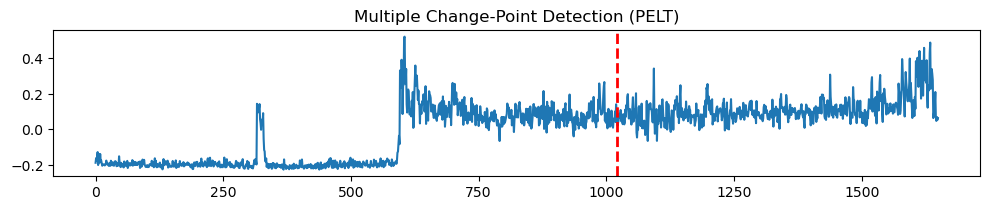

0.724946
3.434996
11.2249785


In [6]:
# Detect change points

# Convert Series to a NumPy array (2D for "rbf" model):
signal = mds.samples["PC1"].values.reshape(-1, 1)

# 2) Apply a change-point detection algorithm
#    We'll use PELT here with an "rbf" (Gaussian) cost model.
algo = rpt.Pelt(model="rbf").fit(signal)


# 3) Predict the change-points using a penalty method (pen=10 here is arbitrary;
#    you'll need to tune it based on your data characteristics).
change_points = algo.predict(pen=10)

print("Detected change-points:", change_points)

#rpt.display(signal, [], change_points)
rpt.display(signal, [])
plt.title("Multiple Change-Point Detection (PELT)")

# Add a vertical change point line manually
#plt.axvline(x=1255, color="red", linestyle="--", linewidth=2)
#plt.axvline(x=330, color="red", linestyle="--", linewidth=2)
#plt.axvline(x=593, color="red", linestyle="--", linewidth=2)
plt.axvline(x=1020, color="red", linestyle="--", linewidth=2)

# Save the plot to a figure
plt.savefig(output_plot_dir + output_plot_name + "_breakpoint.png", dpi=300, bbox_inches="tight")

plt.show()

print(window_center_mb[15])
print(window_center_mb[255])
print(window_center_mb[1020])


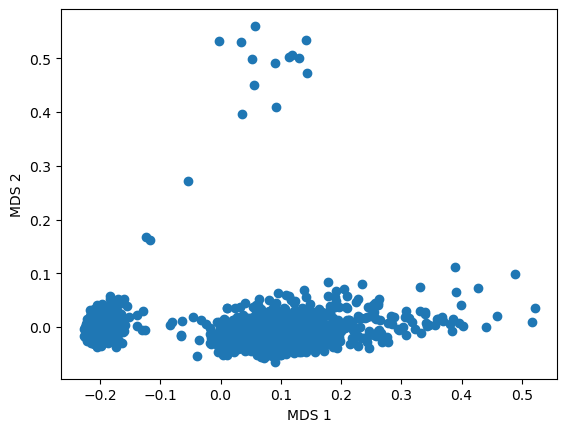

In [6]:
plt.figure()
plt.scatter(x=mds.samples["PC1"], y=mds.samples["PC2"])
_ = plt.xlabel("MDS 1")
_ = plt.ylabel("MDS 2")


In [114]:
# Create corners based on outliers for a certain proportion of the data
mds_12 = mds.samples.loc[:, ["PC1", "PC2"]].copy()
xy = mds_12.to_numpy()
corners = lostruct.corners(xy, prop=0.1) # no k parameter implemented yet
#np.savetxt(output_table_dir + output_plot_name + "corners.txt", corners, delimiter=",")
#print(corners[:10])
#help(lostruct.corners)
#print(xy[:10])


np.savetxt(output_table_dir + output_plot_name + "xy_data.csv", xy, delimiter=",")
print('made table')

print('calculate z score')

# Calculate Z-scores

# Method 1: Manual Calculation
#mean = np.mean(xy, axis=0)
#std = np.std(xy, axis=0)
#z_scores_manual = (xy - mean) / std

#print('done')
#print(z_scores_manual)

# Create a DataFrame for better representation
columns = ['MDS1', 'MDS2']
df = pd.DataFrame(xy, columns=columns)

# Calculate z-scores for each column and add them to the DataFrame
for column in df.columns:
    mean = df[column].mean()
    std = df[column].std()
    z_scores = (df[column] - mean) / std
    z_scores_round = np.round(z_scores,2)
    abs_z_scores = np.abs(z_scores)
    abs_z_scores_round = np.round(abs_z_scores,2)
    df[f'{column}_zscore'] = z_scores_round
    df[f'{column}_abs_zscore'] = abs_z_scores_round

# Display the updated DataFrame
#print(df)
np.savetxt(output_table_dir + output_plot_name + "df_zscore_data.csv", df, delimiter=",",fmt="%.2f")

print('done')

# Select indices based on z-score

# See 12 Jan 5-White-eared Honeyeater note!

# column 4 [:,3] is absolute value, but it's picking up outliers I don't want(?)
#selected_indices = np.where(df.iloc[:, 3] > 0.4)[0]

# column 3 [:,2] is *not* absolute value 
#selected_indices = np.where(df.iloc[:, 2] > 0)[0]
selected_indices = np.where(df.iloc[:, 2] < -1)[0]

#selected_indices = np.where(df.iloc[:, 4] > 1)[0]

#selected_indices = np.where((df.iloc[:, 2] < -0.3) | (df.iloc[:, 2] > -0.3))[0]
#print(selected_indices)
print('YES!')

# Add the outliers as a variable called 'corner' to the mds_12 array
mds_12['corner'] = 'other'
mds_12['window'] = range(pc_dists.shape[0])
mds_12['window_center'] = window_center

for i in range(1):
	mds_12.iloc[selected_indices, 2] = f'corner {i+1}'
#print(mds_12['window_center'])
   
# Update 'corner' based on conditions in window_center for pri_ptg000015l inversion outliers
#mds_12.loc[mds_12['window_center'] < 7000000, 'corner'] = 'other'  
#selected_indices = mds_12.loc[mds_12['corner'] == 'corner 1', 'window']

# Update 'corner' based on conditions in window_center for pri_ptg000015l to show pattern for NON outliers
mds_12.loc[mds_12['window_center'] < 500000, 'corner'] = 'other'  
mds_12.loc[mds_12['window_center'] > 6500000, 'corner'] = 'other'  
selected_indices = mds_12.loc[mds_12['corner'] == 'corner 1', 'window']
    
# Update 'corner' based on conditions in window_center for scaffold_17
#mds_12.loc[mds_12['window_center'] > 15095087.0, 'corner'] = 'other'  
   
# Update 'corner' based on conditions in window_center for scaffold_4
#mds_12.loc[mds_12['window_center'] > 107000000, 'corner'] = 'other' # cluster1
#mds_12.loc[mds_12['window_center'] < 108000000, 'corner'] = 'other' # cluster2
#mds_12.loc[mds_12['window_center'] > 118500000, 'corner'] = 'other' # cluster2
#selected_indices = md_12.where(mds_12['corner'] ='corner')[0]



# Update 'corner' based on conditions in window_center for scaffold_8
#mds_12.loc[mds_12['window_center'] < 20000000, 'corner'] = 'other' # cluster1
#mds_12.loc[mds_12['window_center'] > 8000000, 'corner'] = 'other' # cluster2


#selected_indices = mds_12.loc[mds_12['corner'] == 'corner 1', 'window']

#print(mds_12.iloc[:, 2])


# Example: Adjust pandas settings to print all rows
#pd.set_option('display.max_rows', None)  # Display all rows
#pd.set_option('display.max_columns', None)  # Display all columns (if needed)

# Print the 'corner' column or the entire DataFrame
#print(mds_12['corner'])  # Print all rows of the 'corner' column

#print(window_center)

made table
calculate z score
done
YES!


In [115]:
print(selected_indices)
#print(df)
#print(mds_12)
#print(mds_12['corner'])
#print(corners[:,0])
#print(corners[:,1])
#print(corners[:,2])

2        2
5        5
7        7
8        8
10      10
      ... 
555    555
556    556
557    557
558    558
559    559
Name: window, Length: 537, dtype: int64


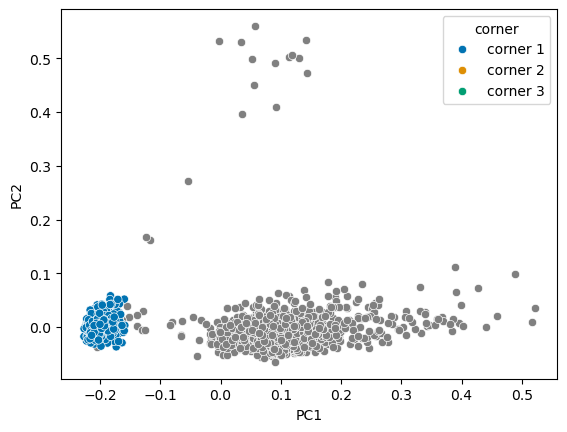

In [116]:
# Create columns based on corners

#mds_12['corner'] = 'other'
#mds_12['window'] = range(pc_dists.shape[0])
#mds_12['window_center'] = window_center

#for i in range(3):
#	mds_12.iloc[corners[:,i], 2] = f'corner {i+1}'

_ = sns.scatterplot(
	data=mds_12[mds_12.corner=='other'], x="PC1", y="PC2", color='gray',
)
_ = sns.scatterplot(
	data=mds_12[mds_12.corner!='other'], x="PC1", y="PC2", hue="corner",
	hue_order=["corner 1", "corner 2", "corner 3"],
	palette='colorblind',
)

# Save the plot to a file
#plt.savefig(output_plot_dir + output_plot_name + "_pc1_pc2_scatterplot.png", dpi=300, bbox_inches="tight")
#plt.savefig(output_plot_dir + output_plot_name + "_cluster1_pc1_pc2_scatterplot.png", dpi=300, bbox_inches="tight")
#plt.savefig(output_plot_dir + output_plot_name + "_cluster2_pc1_pc2_scatterplot.png", dpi=300, bbox_inches="tight")

# Close the plot
#plt.close()


In [117]:


# Convert `window_center` to megabases (Mb)
mds_12['window_center_mb'] = mds_12['window_center'] / 1e6

_ = sns.scatterplot(
	data=mds_12[mds_12.corner=='other'],
	x='window_center_mb', y='PC1', color='gray',
)
_ = sns.scatterplot(
	data=mds_12[mds_12.corner!='other'],
	x="window_center_mb", y="PC1", hue="corner",
	hue_order=["corner 1", "corner 2", "corner 3"],
	palette='colorblind',
)
_ = plt.xlabel("Position of window (Mb)")
_ = plt.ylabel("MDS 1")


# Save the plot to a figure
plt.savefig(output_plot_dir + output_plot_name + "_NONoutlier_pc1_position_scatterplot.png", dpi=300, bbox_inches="tight")
#plt.savefig(output_plot_dir + output_plot_name + "_pc1_position_scatterplot.png", dpi=300, bbox_inches="tight")
#plt.savefig(output_plot_dir + output_plot_name + "_cluster1_pc1_position_scatterplot.png", dpi=300, bbox_inches="tight")
#plt.savefig(output_plot_dir + output_plot_name + "_cluster2_pc1_position_scatterplot.png", dpi=300, bbox_inches="tight")
#Close the plot
plt.close()
#

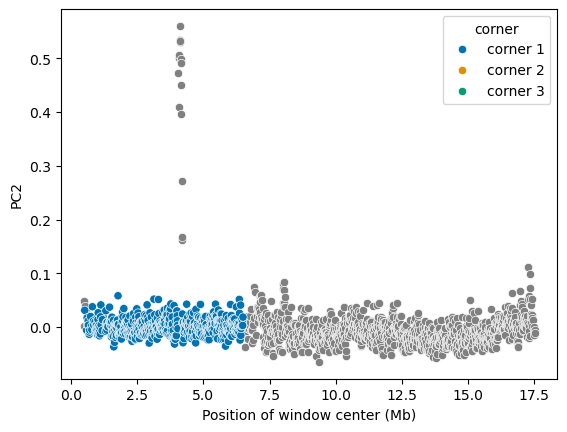

In [95]:
_ = sns.scatterplot(
	data=mds_12[mds_12.corner=='other'],
	x='window_center_mb', y='PC2', color='gray',
)
_ = sns.scatterplot(
	data=mds_12[mds_12.corner!='other'],
	x="window_center_mb", y="PC2", hue="corner",
	hue_order=["corner 1", "corner 2", "corner 3"],
	palette='colorblind',
)
_ = plt.xlabel("Position of window center (Mb)")



# Save the plot to a figure
#plt.savefig(output_plot_dir + output_plot_name + "_pc2_position_scatterplot.png", dpi=300, bbox_inches="tight")
#plt.savefig(output_plot_dir + output_plot_name + "_cluster1_pc2_position_scatterplot.png", dpi=300, bbox_inches="tight")
#plt.savefig(output_plot_dir + output_plot_name + "_cluster2_pc2_position_scatterplot.png", dpi=300, bbox_inches="tight")
# Close the plot
#plt.close()

In [118]:

store_dir ='/n/netscratch/edwards_lab/Lab/smorzechowski/meliphagid/analysis/2024-11-03/16-local_pcangsd/zarr_dir/'

### CHANGE THIS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ###
zarr_file = 'pri_ptg000015l_rm_filt.zarr'

#del ds
ds = lp.load_dataset(store_dir + zarr_file, chunks=100000) # open the Dataset

# EXTREMELY IMPORTANT TO USE THE SAME WINDOW SIZE THAT YOU CREATED THE PCA WITH 

# the following is for microchromosomes and unplaced scaffolds!!!!
ds = lp.window(ds, type='position', size=10000, min_variant_number = 50)

# the following is for larger chromosomes!!!!
#ds = lp.window(ds, type='position', size=50000, min_variant_number = 500)

#del corner1_pca
#corner1_pca = lp.pcangsd_merged_windows(ds, corners[:,0], k=5)

#del corner2_pca
#corner2_pca = lp.pcangsd_merged_windows(ds, corners[:,1], k=5)

#del corner3_pca
#corner3_pca = lp.pcangsd_merged_windows(ds, corners[:,2], k=5)

#del corner1_pca
corner1_pca = lp.pcangsd_merged_windows(ds, selected_indices, k=74)



EM (MAF) converged at iteration: 22
Using 1 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2). RMSE=0.006210833547598688
Individual allele frequencies estimated (3). RMSE=0.00214988546419795
Individual allele frequencies estimated (4). RMSE=0.0010144154962641292
Individual allele frequencies estimated (5). RMSE=0.0005673448004130645
Individual allele frequencies estimated (6). RMSE=0.00034463603534743705
Individual allele frequencies estimated (7). RMSE=0.0002222740159515995
Individual allele frequencies estimated (8). RMSE=0.00014638812174746496
Individual allele frequencies estimated (9). RMSE=9.936257864744581e-05
Individual allele frequencies estimated (10). RMSE=6.84136377098015e-05
Individual allele frequencies estimated (11). RMSE=4.881390015888009e-05
Individual allele frequencies estimated (12). RMSE=3.6169603023136015e-05
Individual allele frequencies estimated (13). RMSE=2.8350017225058847e-05
Individual

In [119]:
# Calculate percent variation of each PC axis

# access the eigenvalues from the tuple created above
evals = corner1_pca[2]

# calculate the fraction of the variance
frac_var = evals / evals.sum()

pc1_variance_percent = frac_var[0] * 100
pc2_variance_percent = frac_var[1] * 100

print(pc1_variance_percent)
print(pc2_variance_percent)



4.179628565907478
0.161768717225641


         Sample     Pop
0     Ben_166_F  Weddin
1     Ben_167_M  Weddin
2     Ben_168_F  Weddin
3   Berht_163_F  Weddin
4   Berth_157_M  Weddin
..          ...     ...
69  Walch_154_M   Walch
70  Walch_155_F   Walch
71   Zost_330_M    Zost
72   Zost_331_F    Zost
73   Zost_332_M    Zost

[74 rows x 2 columns]


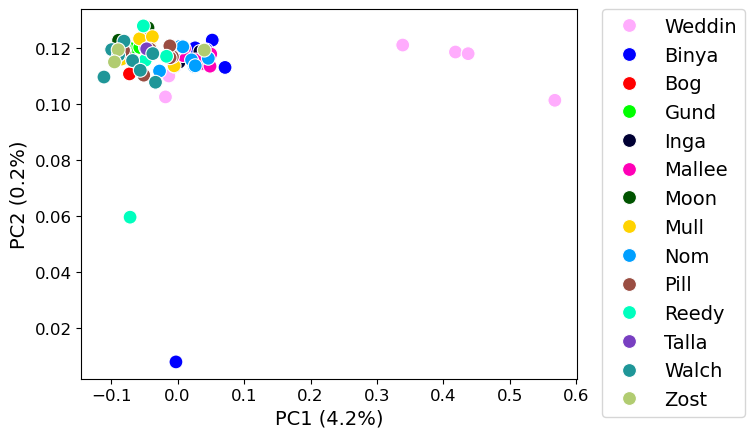

In [121]:
pop='/n/netscratch/edwards_lab/Lab/smorzechowski/meliphagid/analysis/2024-11-03/16-local_pcangsd/all_samples_pops.tsv'


meta = pd.read_csv(pop, sep='\t')
print(meta)
# Custom palette
custom_palette = sns.color_palette([
    "#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00",
    "#FFFF33", "#A65628", "#F781BF", "#999999", "#66C2A5",
    "#FC8D62", "#8DA0CB", "#E78AC3", "#A6D854"
])


# reordered to match the colors in PCA and admixture figures
pcangsd_palette = sns.color_palette([
    "#FFACFD", "#0000FF", "#FF0000", "#00FF00","#000033","#FF00B6", 
    "#005300", "#FFD300", "#009FFF", "#9A4D42", "#00FFBE",
    "#783FC1", "#1F9698", "#B1CC71"
])

#pcangsd_palette = sns.color_palette([
#    "#0000FF", "#FF0000", "#00FF00", "#000033", "#FF00B6",
#    "#005300", "#FFD300", "#009FFF", "#9A4D42", "#00FFBE",
#    "#783FC1", "#1F9698", "#FFACFD", "#B1CC71"
#])


# Plot corner 1
_ = sns.scatterplot(
        x=corner1_pca[3][0], y=corner1_pca[3][1],
        hue=meta['Pop'],
        palette=pcangsd_palette,
        s=100
)

# Flip x-axis
#plt.gca().invert_xaxis()

# Include the percentage in the axis labels
_ = plt.xlabel(f"PC1 ({pc1_variance_percent:.1f}%)",fontsize=14)
_ = plt.ylabel(f"PC2 ({pc2_variance_percent:.1f}%)",fontsize=14)
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,fontsize=14)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)


#corner='_corner_1'
corner='_outliers_'
#print(selected_indices)
# Save the plot to a figure

#plt.savefig(output_plot_dir + output_plot_name + corner + "merged_NON_outlier_intervals_scatterplot.png", dpi=300, bbox_inches="tight")
#plt.savefig(output_plot_dir + output_plot_name + corner + "merged_outlier_intervals_scatterplot.png", dpi=300, bbox_inches="tight")
#plt.savefig(output_plot_dir + output_plot_name + corner + "cluster1_merged_outlier_intervals_scatterplot.png", dpi=300, bbox_inches="tight")
#plt.savefig(output_plot_dir + output_plot_name + corner + "cluster2_merged_outlier_intervals_scatterplot.png", dpi=300, bbox_inches="tight")

# Close the plot
#plt.close()



KMeans(n_clusters=3, random_state=42)


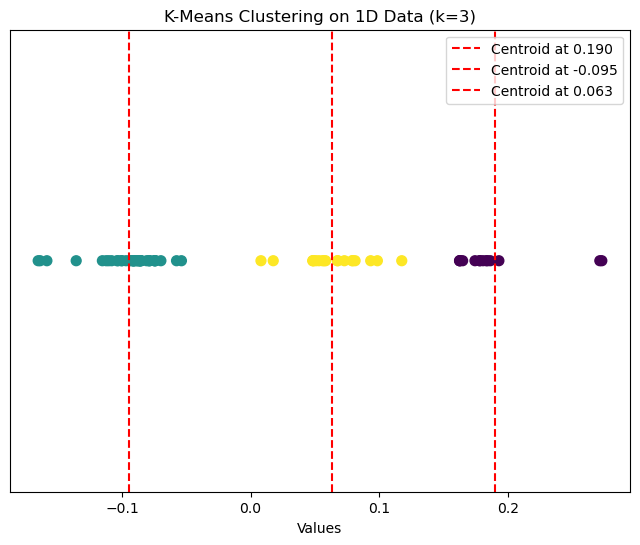

In [19]:
from sklearn.cluster import KMeans

data = corner1_pca[3][0]
#print(data)

# Step 2: Reshape the data for k-means
data_reshaped = data.reshape(-1, 1)  # Reshape to 2D array (n_samples, n_features)
#print(data_reshaped)

# Step 3: Apply K-Means Clustering
k = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_fit = kmeans.fit(data_reshaped)

print(kmeans_fit)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Save cluster labels with the pop.tsv file

# Step 1: Add cluster labels as a new column to meta
meta['Cluster'] = labels  # Add labels as the third column
#print(meta)

# Step 2: Save the updated TSV file
meta.to_csv(output_table_dir + output_plot_name + "_pop_cluster_labels.tsv", sep="\t", index=False)
#meta.to_csv(output_table_dir + output_plot_name + "_pop_cluster1_labels.tsv", sep="\t", index=False)
#meta.to_csv(output_table_dir + output_plot_name + "_pop_cluster2_labels.tsv", sep="\t", index=False)

# Save the labels
np.savetxt(output_table_dir + output_plot_name + "_cluster_labels.txt", labels, fmt="%d", header="Cluster Labels")
#np.savetxt(output_table_dir + output_plot_name + "_cluster1_labels.txt", labels, fmt="%d", header="Cluster Labels")
#np.savetxt(output_table_dir + output_plot_name + "_cluster2_labels.txt", labels, fmt="%d", header="Cluster Labels")

# Save the centroids
np.savetxt(output_table_dir + output_plot_name + "_cluster_centroids.txt", centroids, fmt="%.6f", header="Cluster Centroids")
#np.savetxt(output_table_dir + output_plot_name + "_cluster1_centroids.txt", centroids, fmt="%.6f", header="Cluster Centroids")
#np.savetxt(output_table_dir + output_plot_name + "_cluster2_centroids.txt", centroids, fmt="%.6f", header="Cluster Centroids")

# Step 4: Visualize the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(data, np.zeros_like(data), c=labels, cmap='viridis', s=50)
for centroid in centroids:
    plt.axvline(x=centroid, color='red', linestyle='--', label=f'Centroid at {centroid[0]:.3f}')
plt.title(f'K-Means Clustering on 1D Data (k={k})')
plt.xlabel('Values')
plt.yticks([])  # No y-axis ticks since it's 1D
plt.legend()


# Save the plot to a figure
plt.savefig(output_plot_dir + output_plot_name + corner + "cluster_kmeans_clustering.png", dpi=300, bbox_inches="tight")
#plt.savefig(output_plot_dir + output_plot_name + corner + "cluster1_kmeans_clustering.png", dpi=300, bbox_inches="tight")
#plt.savefig(output_plot_dir + output_plot_name + corner + "cluster2_kmeans_clustering.png", dpi=300, bbox_inches="tight")

plt.show()

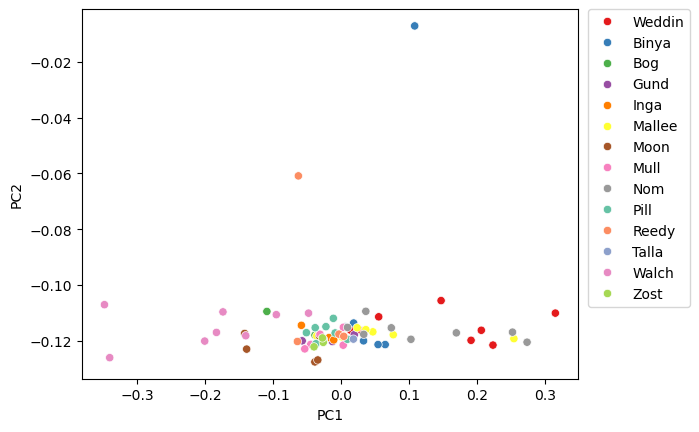

In [72]:
# Plot corner 2
_ = sns.scatterplot(
        x=corner2_pca[3][0], y=corner2_pca[3][1],
        hue=meta['Pop'],
        palette=custom_palette,
)
_ = plt.xlabel("PC1")
_ = plt.ylabel("PC2")
_ = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


corner='_corner_2'

# Save the plot to a figure
plt.savefig(output_plot_dir + output_plot_name + corner + "_merged_outlier_intervals_scatterplot.png", dpi=300, bbox_inches="tight")

# Close the plot
#plt.close()

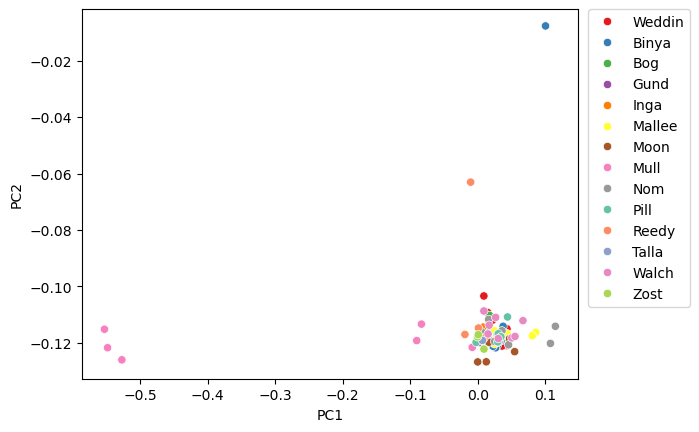

In [73]:
# Plot corner 3
_ = sns.scatterplot(
        x=corner3_pca[3][0], y=corner3_pca[3][1],
        hue=meta['Pop'],
        palette=custom_palette,
)
_ = plt.xlabel("PC1")
_ = plt.ylabel("PC2")
_ = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


corner='_corner_3'

# Save the plot to a figure
#plt.savefig(output_plot_dir + output_plot_name + corner + "_merged_outlier_intervals_scatterplot.png", dpi=300, bbox_inches="tight")

# Close the plot
#plt.close()

In [513]:
help(lp.pcangsd_merged_windows)

Help on function pcangsd_merged_windows in module local_pcangsd.local_pcangsd:

pcangsd_merged_windows(ds: xarray.core.dataset.Dataset, windows_idx: <built-in function array>, k: Optional[int] = None, min_maf: float = 0.05, maf_iter: int = 200, maf_tole: float = 0.0001, n_eig: int = 0, iter: int = 100, tole: float = 1e-05, pcangsd_threads: int = 1) -> tuple
    Compute PCAngsd on merged windows of interest.
    
    Args:
        ds: local_pcangsd dataset containing genotype likelihoods and windows.
        windows_idx: indexes of windows to merge.
        k: number of PCs to retain in the output.
            By default will keep all.
        min_maf: pcangsd minMaf.
        maf_iter: pcangsd maf_iter argument.
        maf_tole: pcangsd maf_tole argument.
        n_eig: pcangsd n_eig argument.
        iter: pcangsd iter argument.
        tole: pcangsd tole argument.
        pcangsd_threads: pcangsd threads argument.
    
    Returns:
        tuple: (covariance matrix, total variance, e